<a href="https://colab.research.google.com/github/mkmin1245/study/blob/main/%EC%8A%A4%ED%83%9D%EC%85%80%ED%83%AD%ED%8F%AD%EC%8B%9C%EB%AE%AC%EB%A0%88%EC%9D%B4%EC%85%98_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 10 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,349 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and dire

In [4]:

import numpy as np
from matplotlib import pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# **1차 시뮬레이션**

In [5]:
"""
for E161A
양극 전폭 WC : 94.5 ± 0.15
AC(1,2,3,4) : 1.35 ± 0.85
TPC1(라미기준 오른쪽) : 12.25 ± 1.1
TWC : 70.0 ± 1.0
TPA1(라미기준 오른쪽) : 13.6 ± 0.9
TWA : 70.0 ± 1.0
"""


'\nfor E161A\n양극 전폭 WC : 94.5 ± 0.15\nAC(1,2,3,4) : 1.35 ± 0.85\nTPC1(라미기준 오른쪽) : 12.25 ± 1.1\nTWC : 70.0 ± 1.0\nTPA1(라미기준 오른쪽) : 13.6 ± 0.9\nTWA : 70.0 ± 1.0\n'

In [6]:
stackingnumber = [a for a in range(1, 60)]
#stackingnumber = [1,2]
average = []
stddev = []
spec_out_rate = []

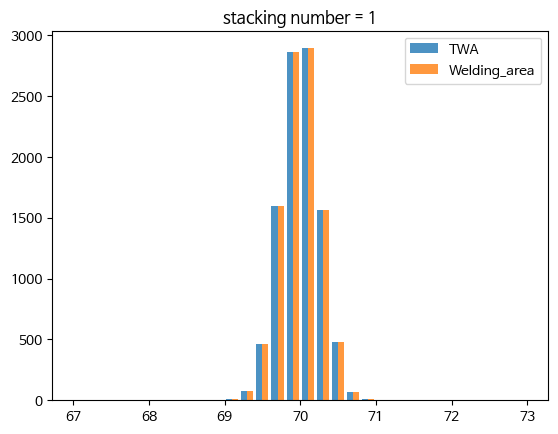

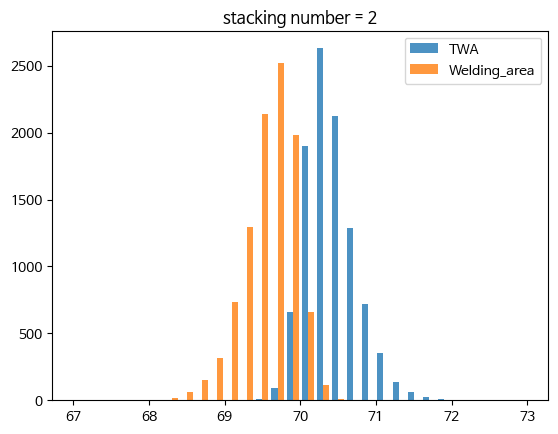

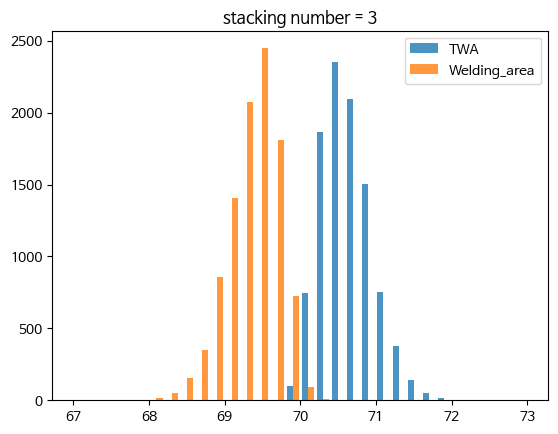

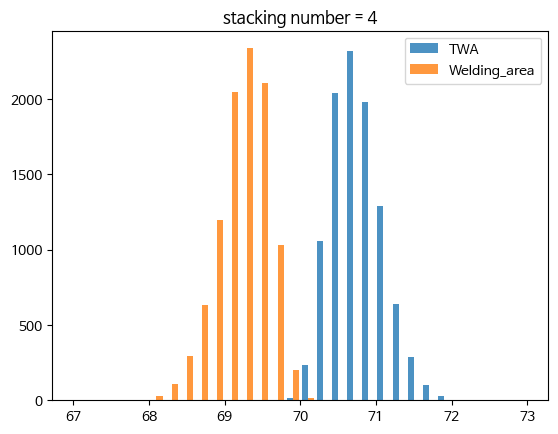

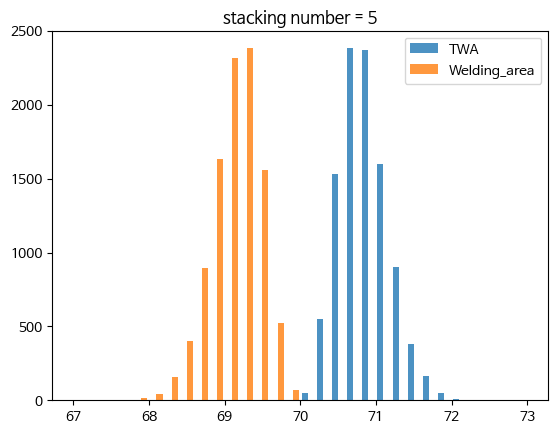

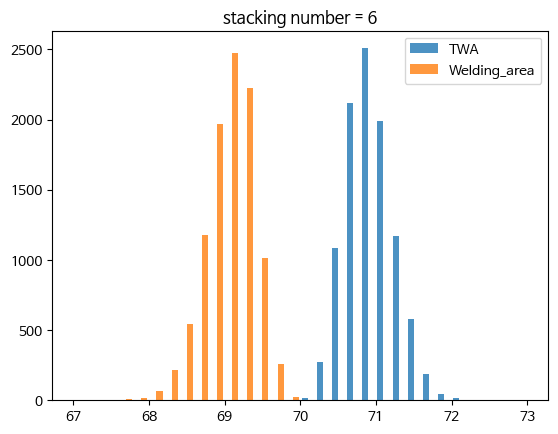

KeyboardInterrupt: ignored

In [7]:
for i in stackingnumber:
  TWA_total = []
  weldingarea_total = []
  spec_out = []
  for j in range(10000):
    stacking_tol = 0.45/4*np.random.randn(i)    #0±0.45, 4시그마 수준
    WC_half = 47.25+0.075/4*np.random.randn(i)
    AC_1 = 1.35+0.85/4*np.random.randn(i)
    TPA = 1.36+0.9/4*np.random.randn(i)
    TWA = 70+1/4*np.random.randn(i)
    stacked_outer_right =  np.max(stacking_tol+WC_half+AC_1-TPA)
    stacked_inner_right =  np.min(stacking_tol+WC_half+AC_1-TPA)
    stacked_outer_left = np.min(stacking_tol+WC_half+AC_1-TPA-TWA)
    stacked_inner_left = np.max(stacking_tol+WC_half+AC_1-TPA-TWA)
    stacked_tab_TWA = stacked_outer_right-stacked_outer_left
    welding_area = stacked_inner_right-stacked_inner_left
    TWA_total.append(stacked_tab_TWA)
    weldingarea_total.append(welding_area)
    if stacked_tab_TWA > 72.5:
      spec_out.append(stacked_tab_TWA)

  spec_out_rate.append(len(spec_out)/10000)
  average.append(np.mean(TWA_total))
  stddev.append(np.std(TWA_total))
  plt.hist([TWA_total, weldingarea_total], bins = 30, range = [67, 73], alpha = 0.8, label = ["TWA", "Welding_area"])
  plt.title(f"stacking number = {i}")
  plt.legend(loc="upper right")
  plt.show()


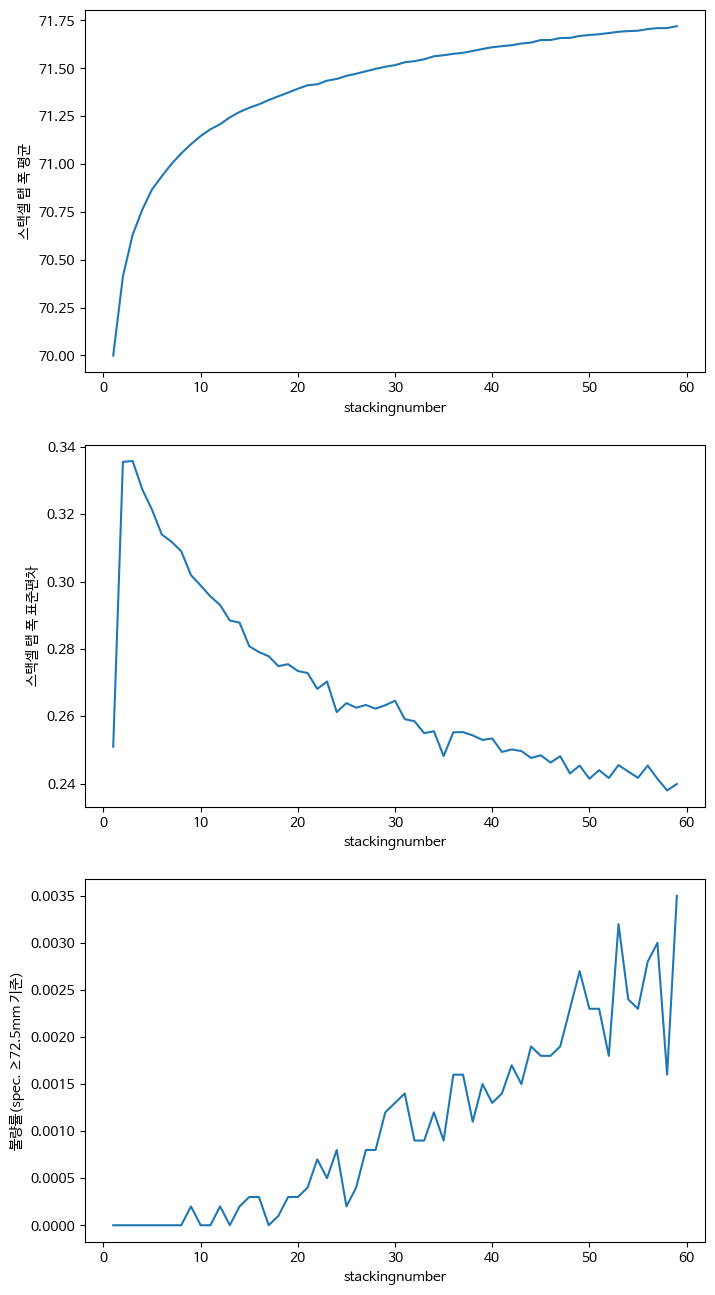

In [5]:
fig, ax = plt.subplots(nrows = 3, figsize = (8, 16))

ax[0].plot(stackingnumber,average)
ax[0].set_xlabel("stackingnumber")
ax[0].set_ylabel("스택셀 탭 폭 평균")
ax[1].plot(stackingnumber,stddev)
ax[1].set_xlabel("stackingnumber")
ax[1].set_ylabel("스택셀 탭 폭 표준편차")
ax[2].plot(stackingnumber, spec_out_rate)
ax[2].set_xlabel("stackingnumber")
ax[2].set_ylabel("불량률(spec. ≥72.5mm 기준)")
plt.show()

# **2차 시뮬레이션**

In [8]:
count = 1000
stackingnumber = [a for a in range(1, 60)]
average_TWA = []
stddev_TWA = []
spec_out_rate_TWA = []
average_WA = []
stddev_WA = []

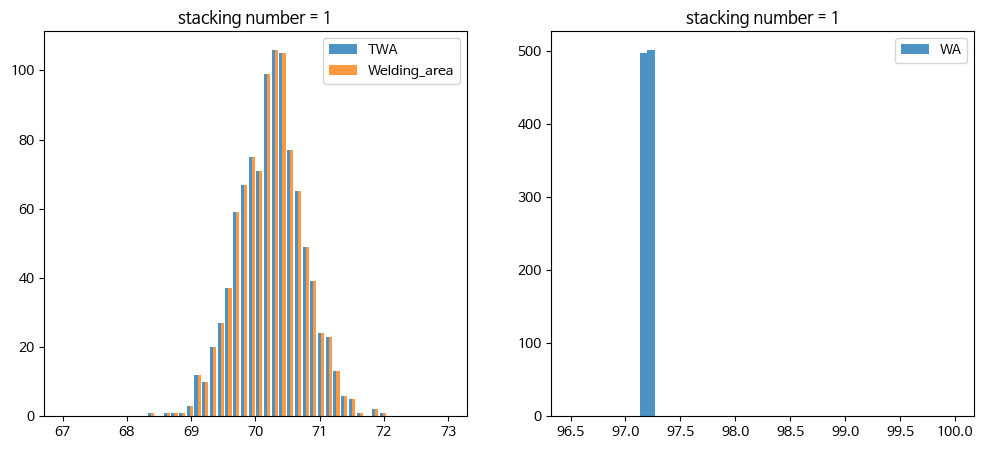

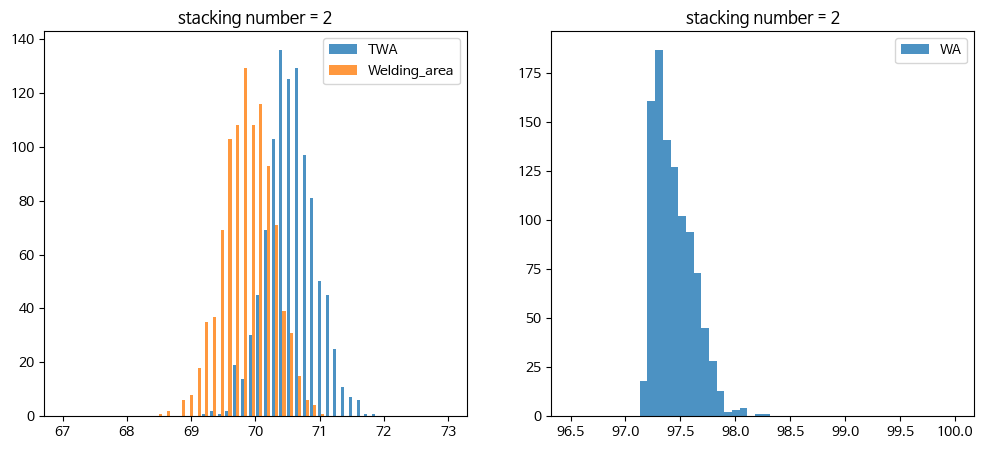

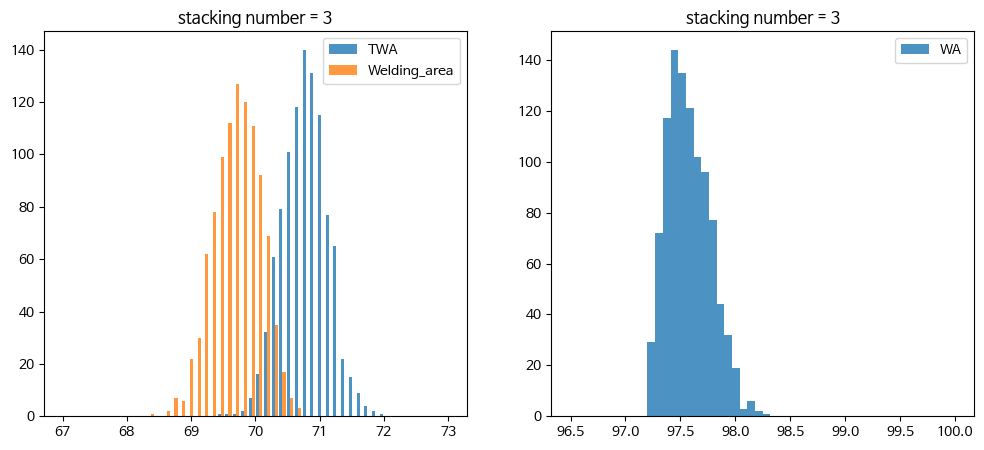

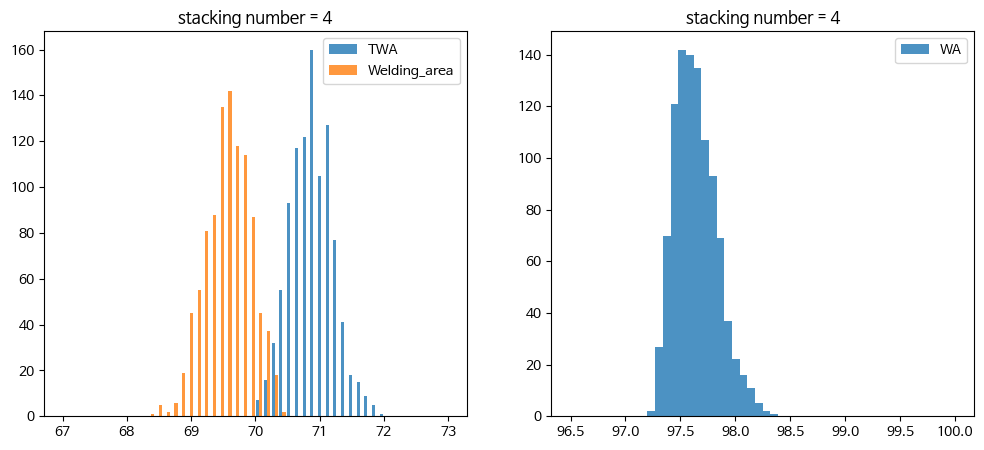

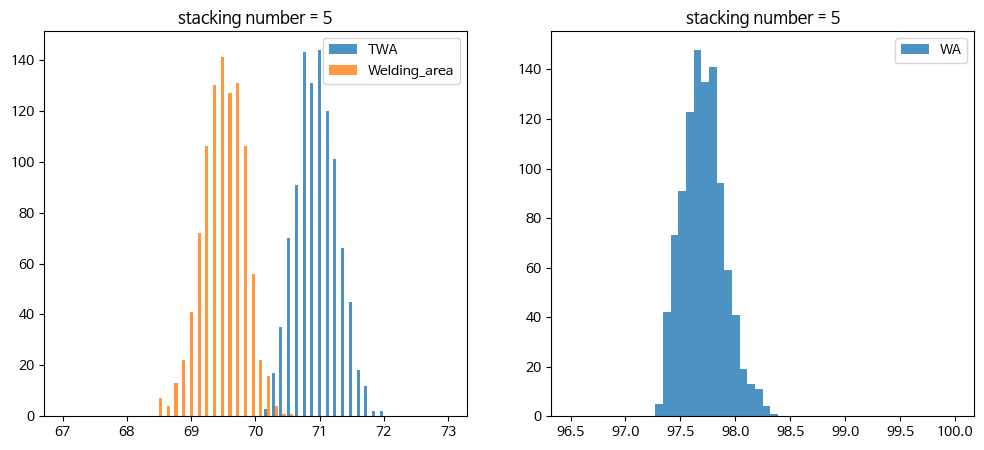

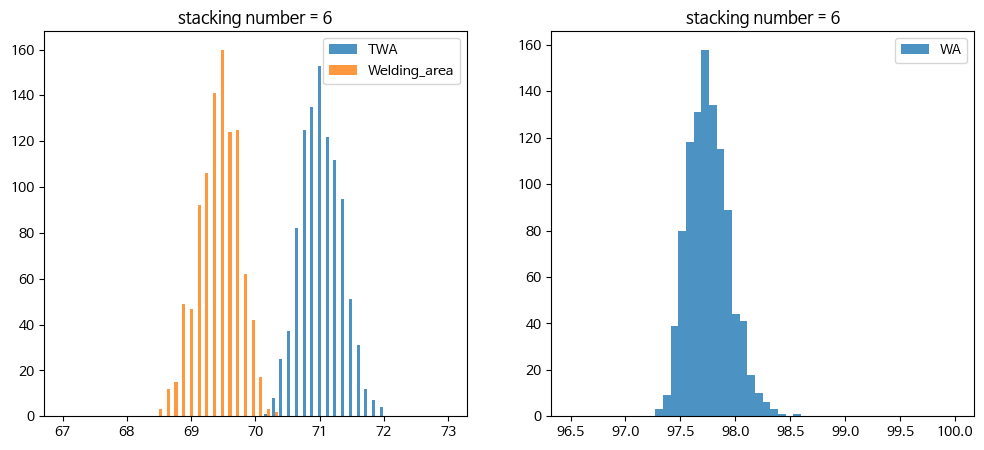

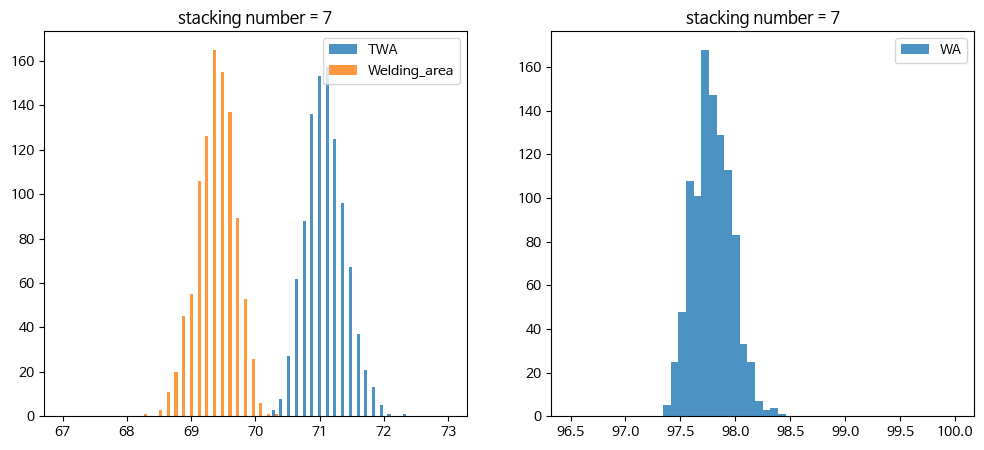

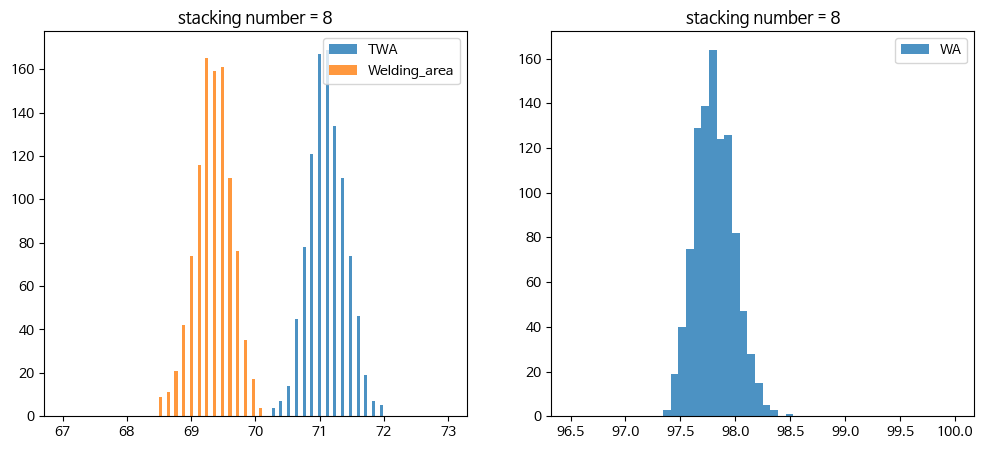

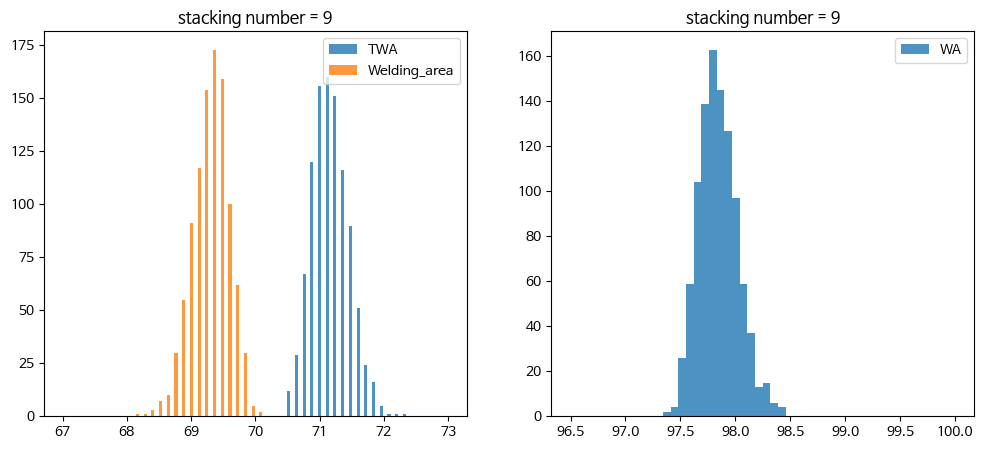

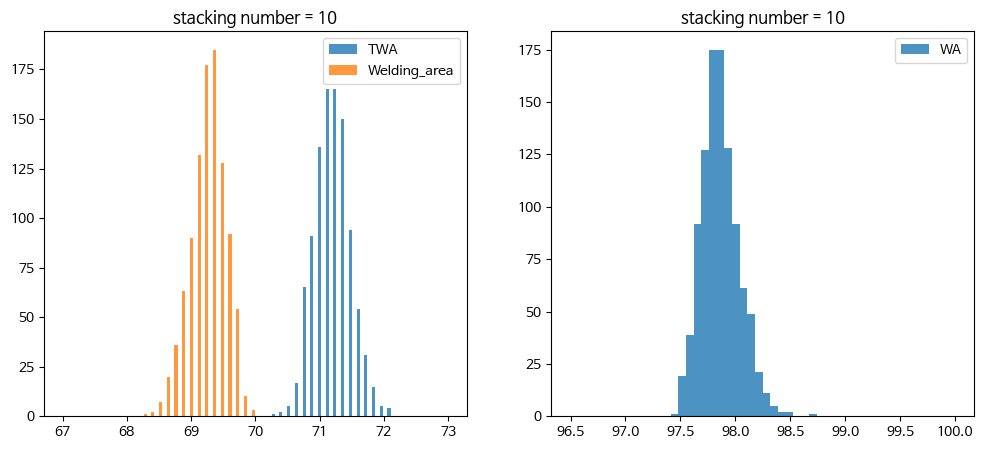

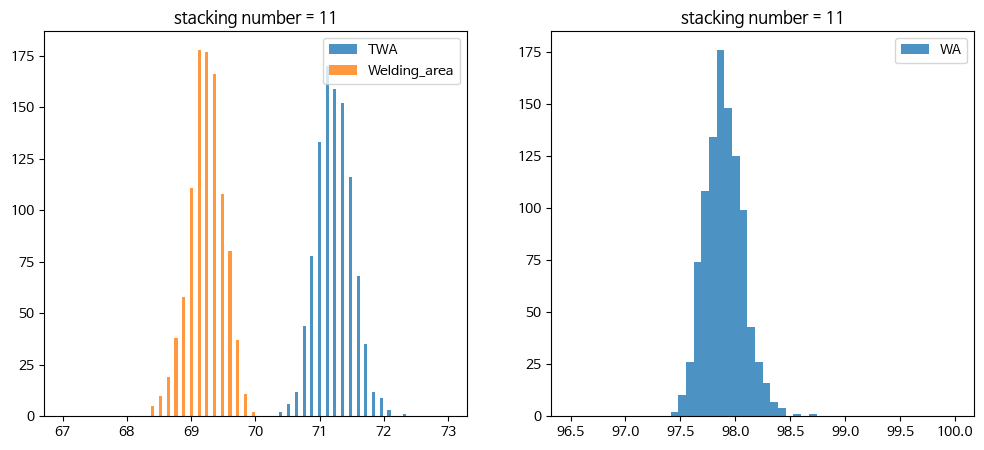

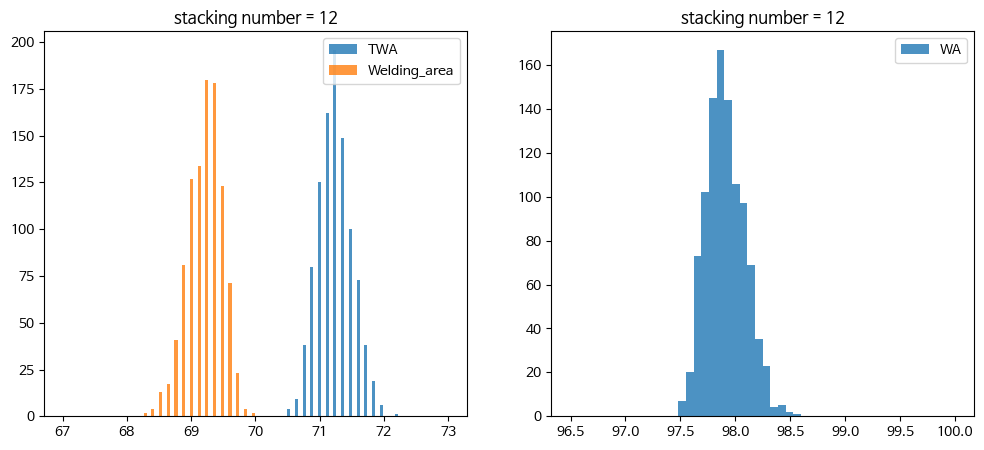

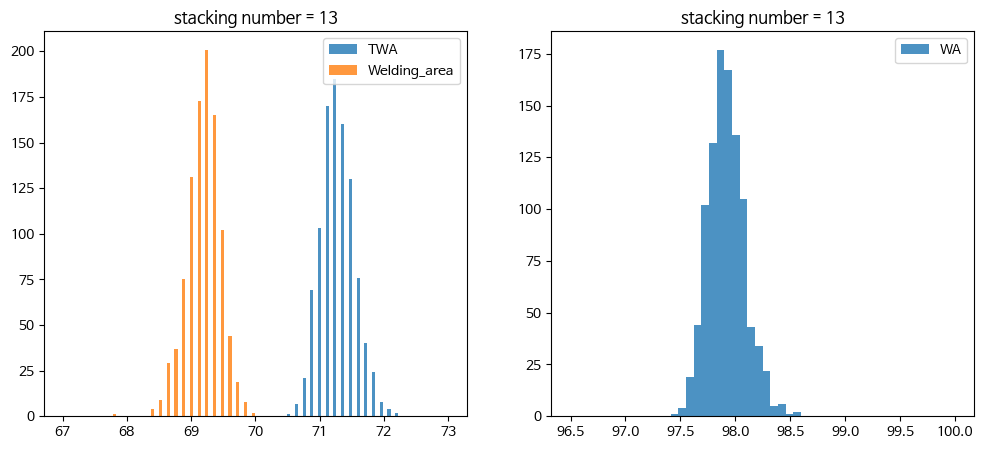

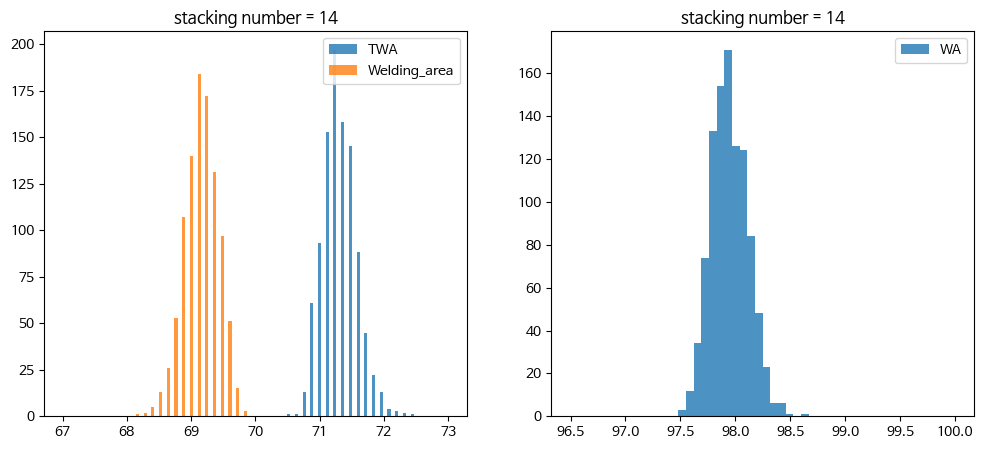

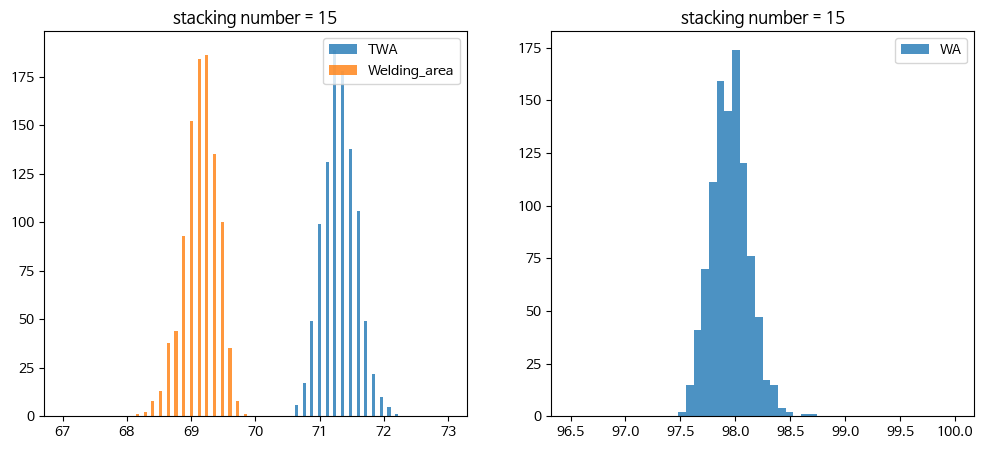

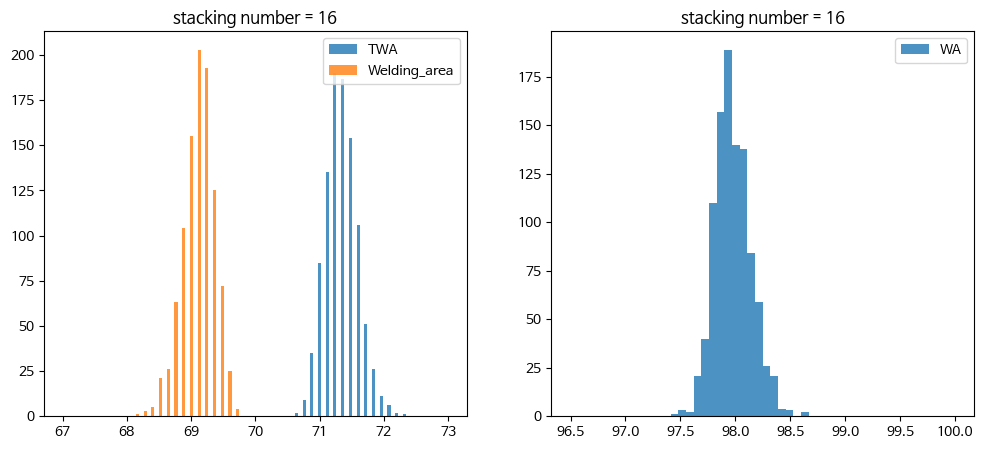

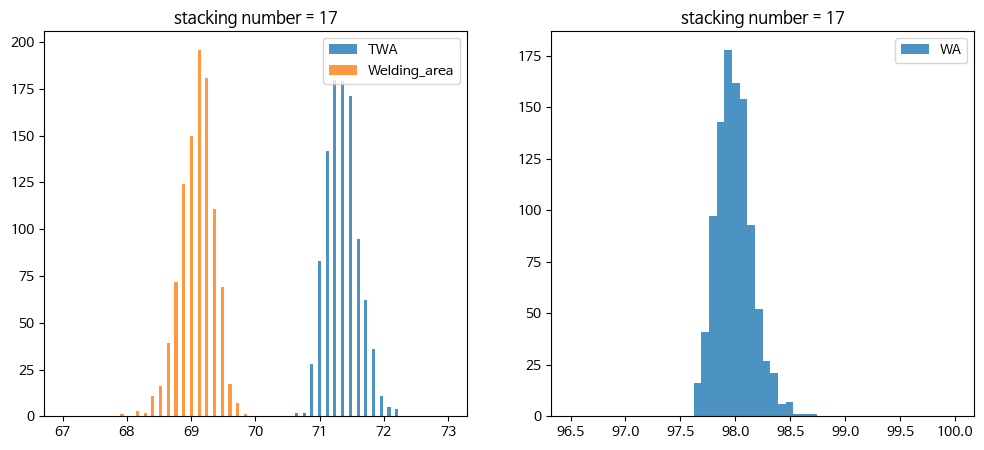

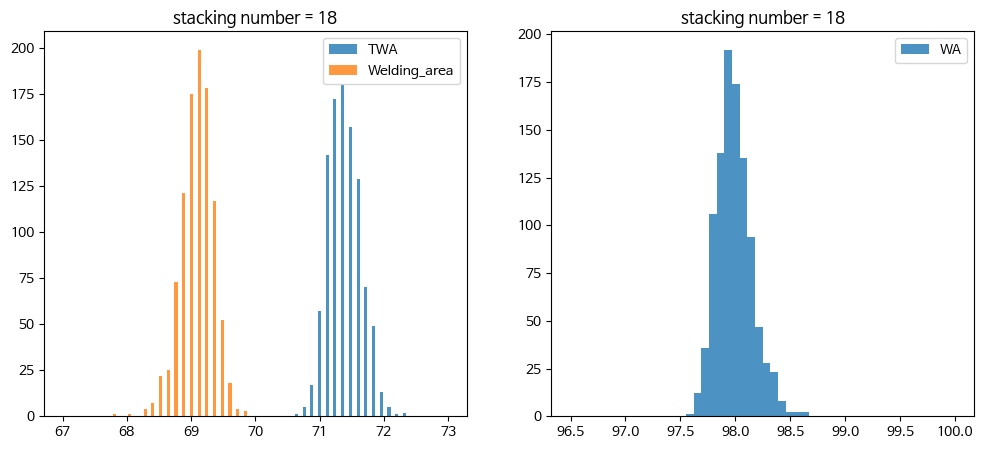

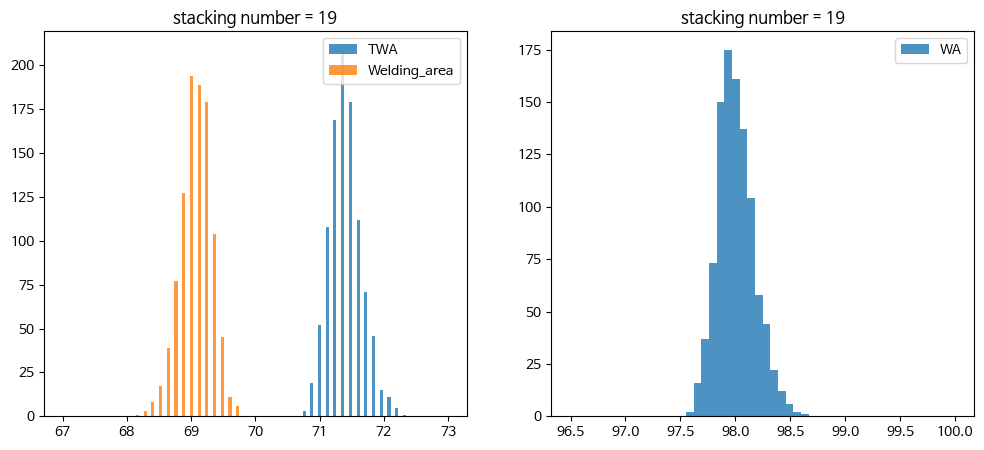

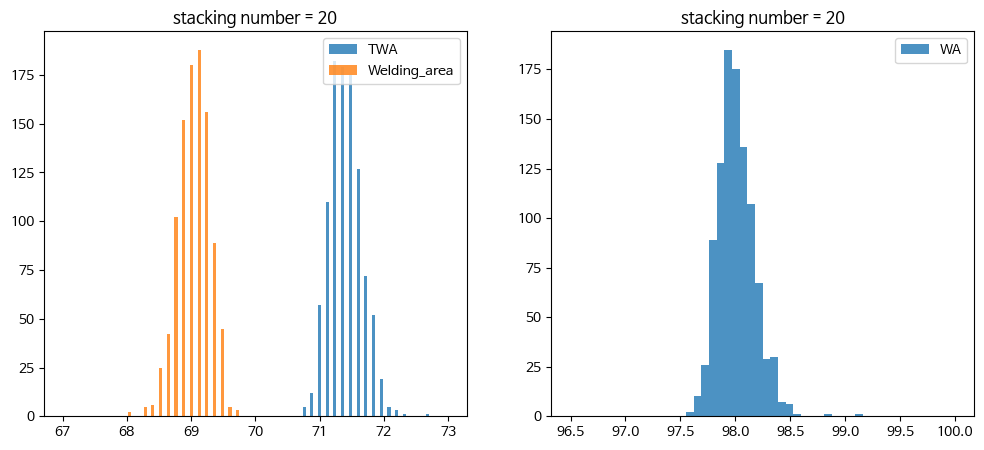

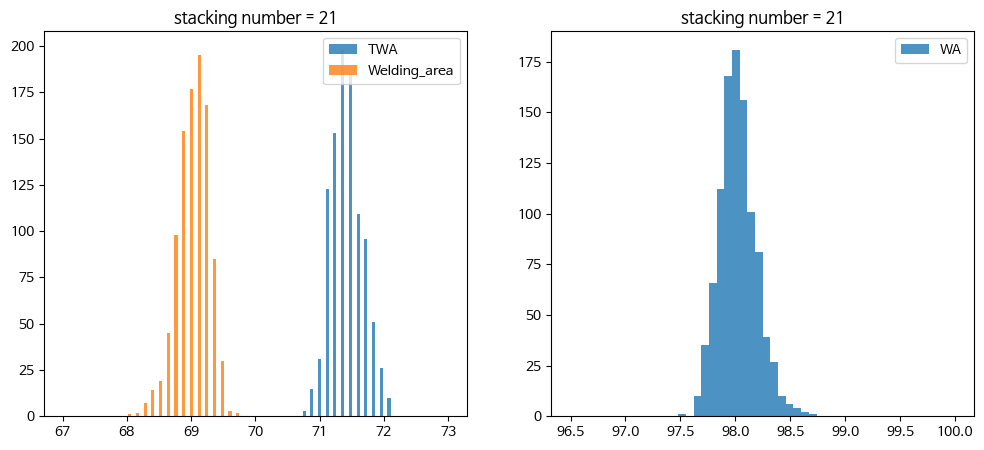

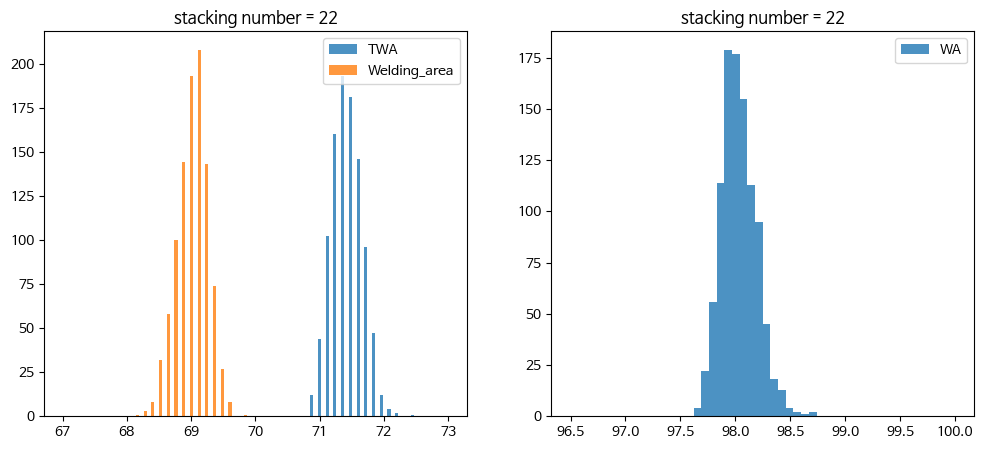

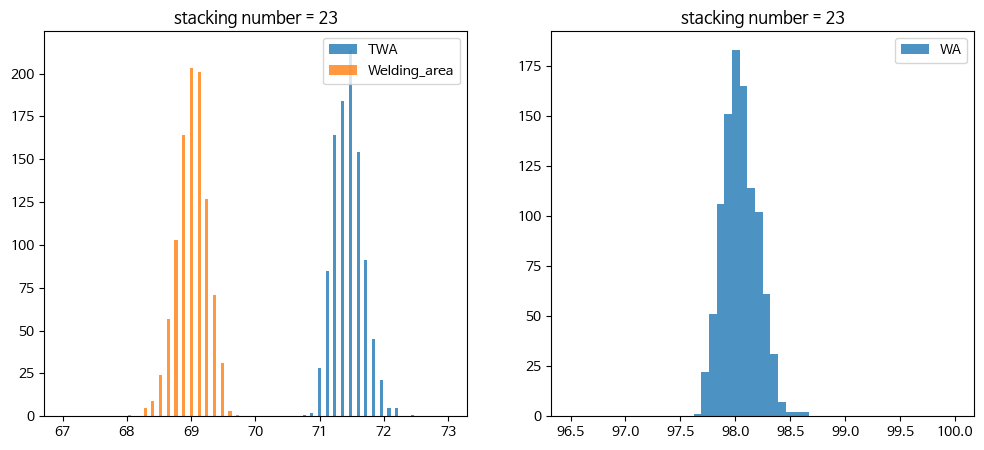

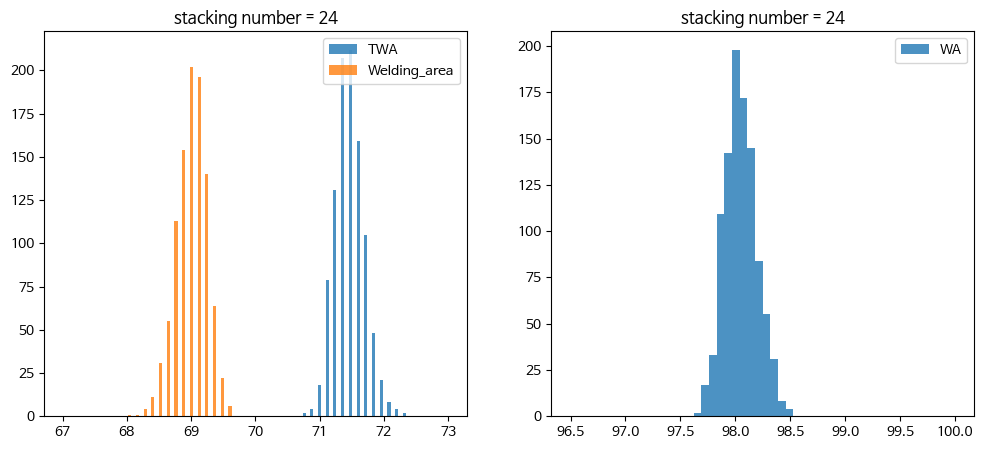

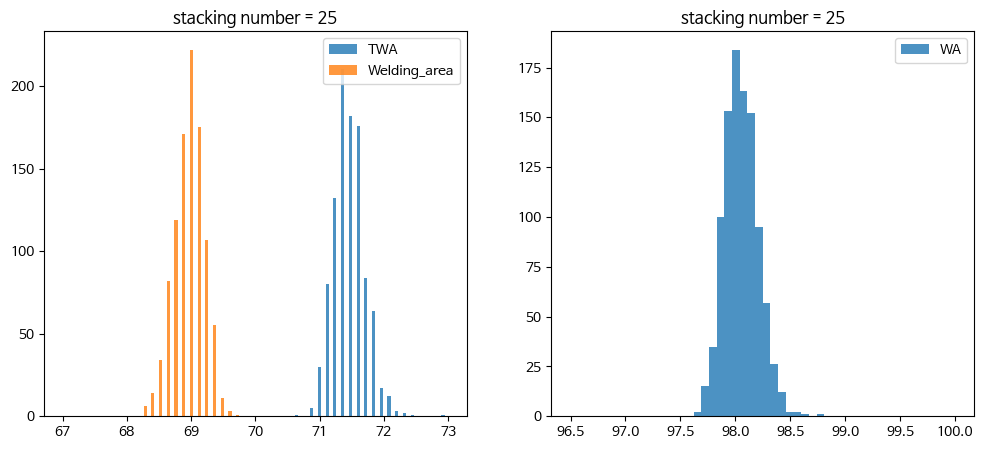

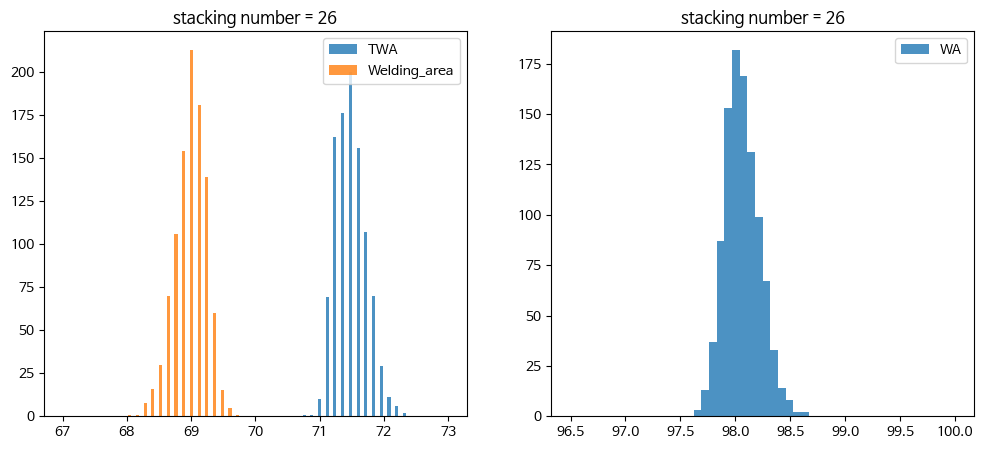

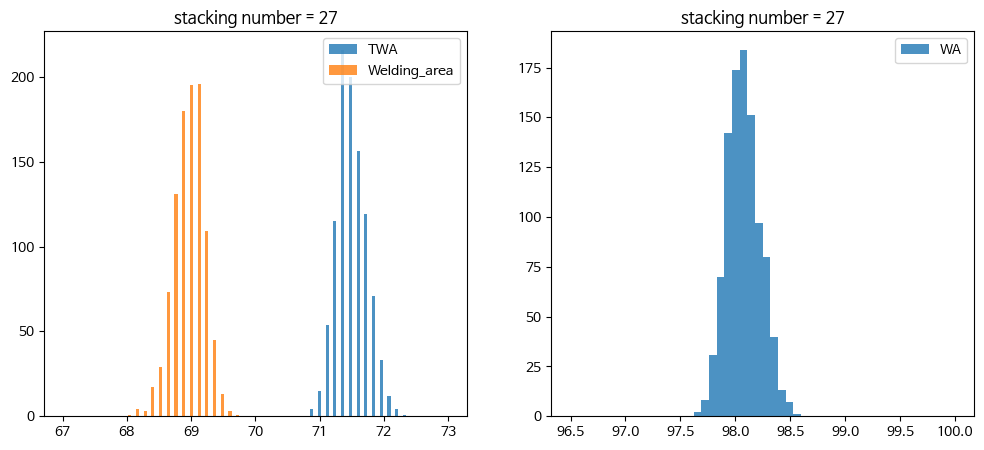

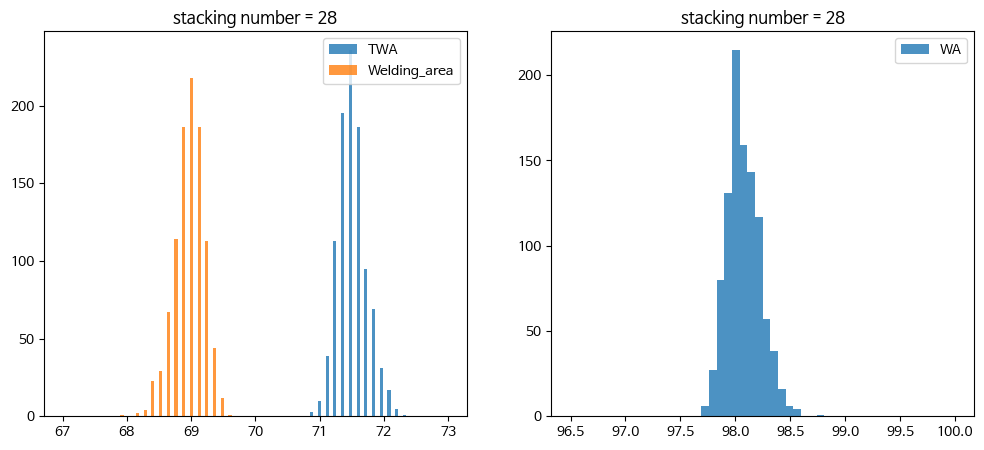

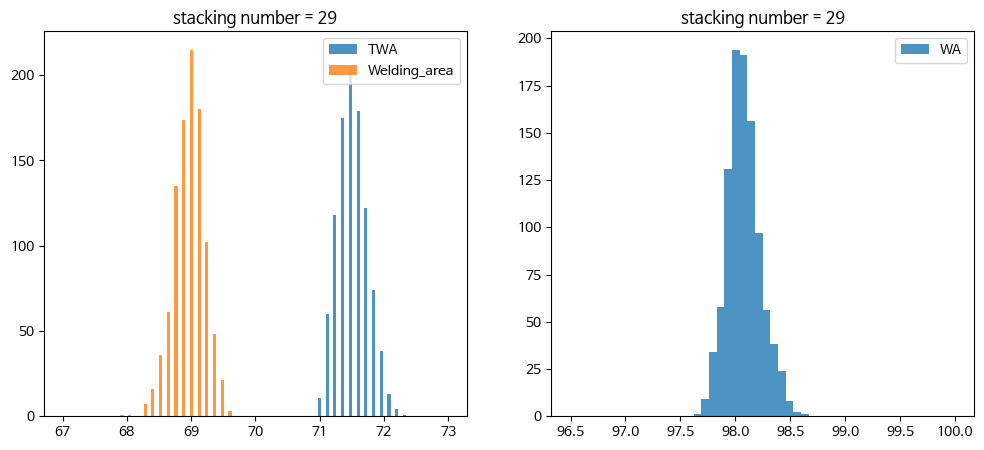

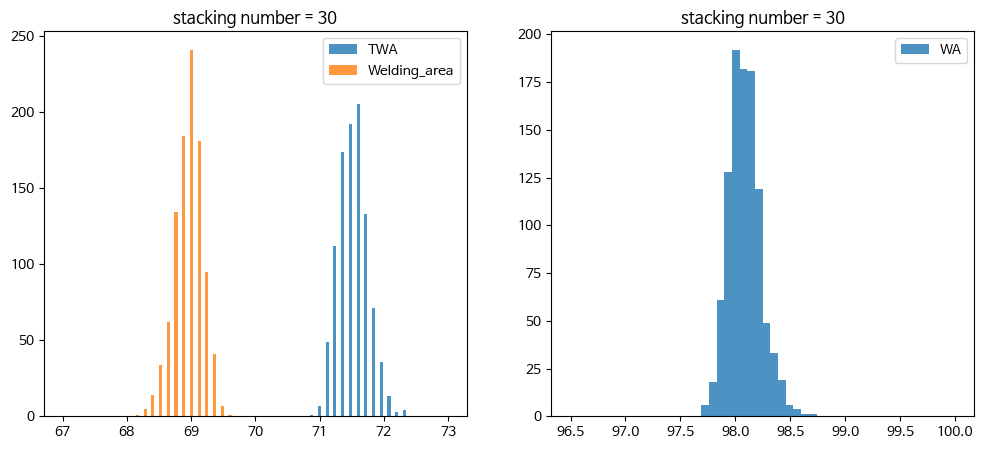

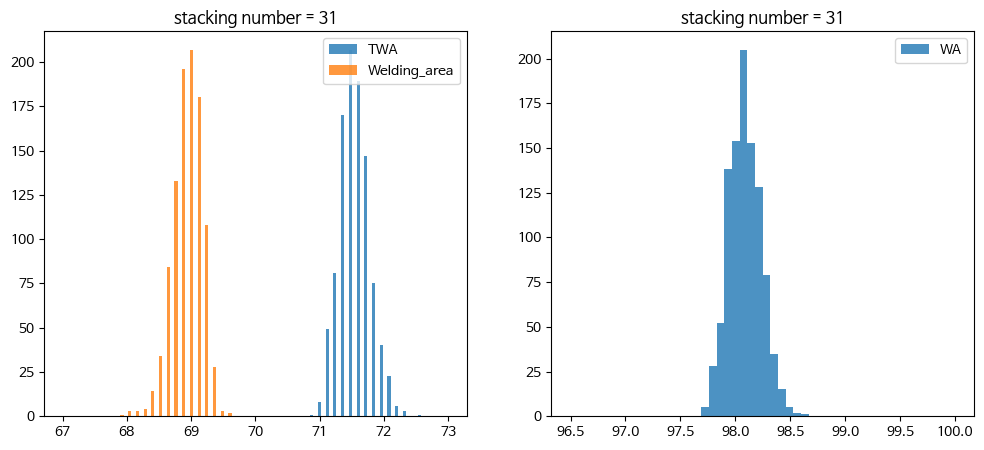

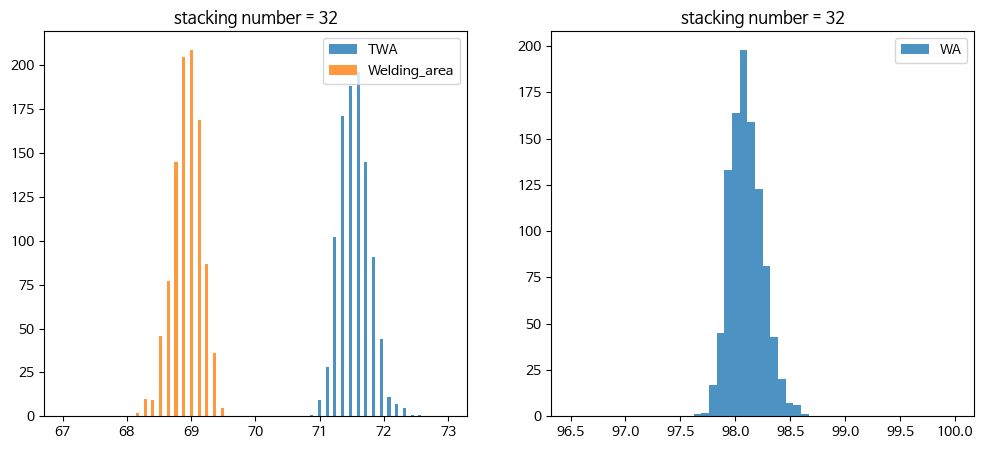

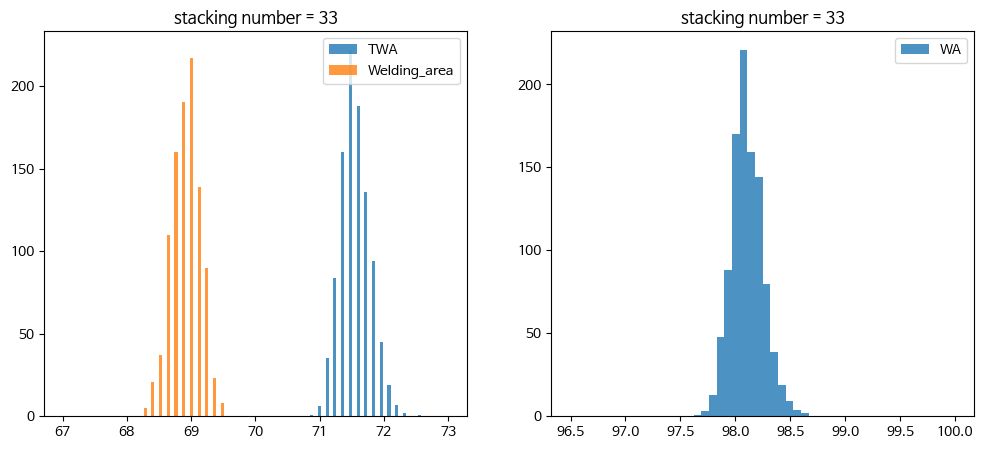

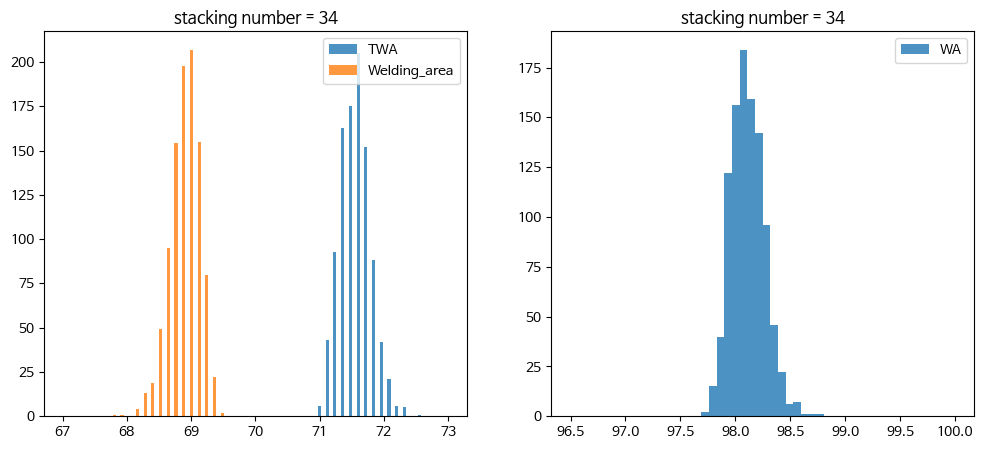

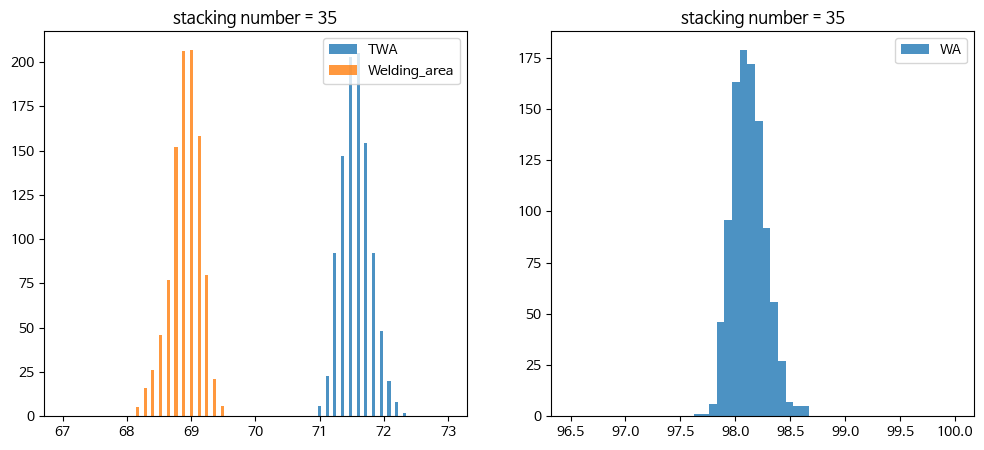

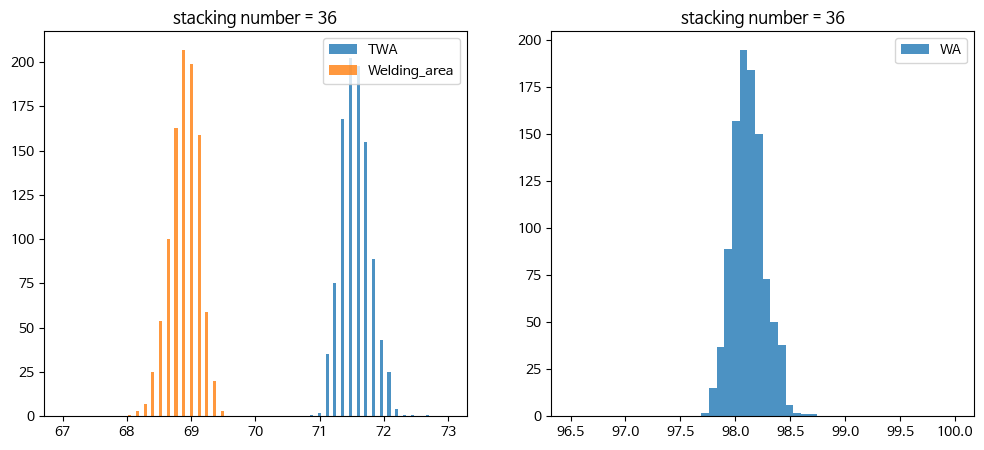

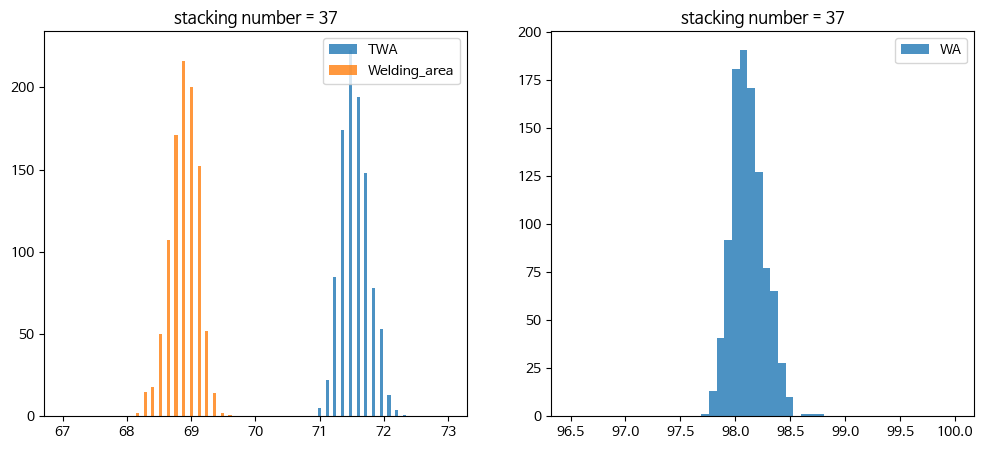

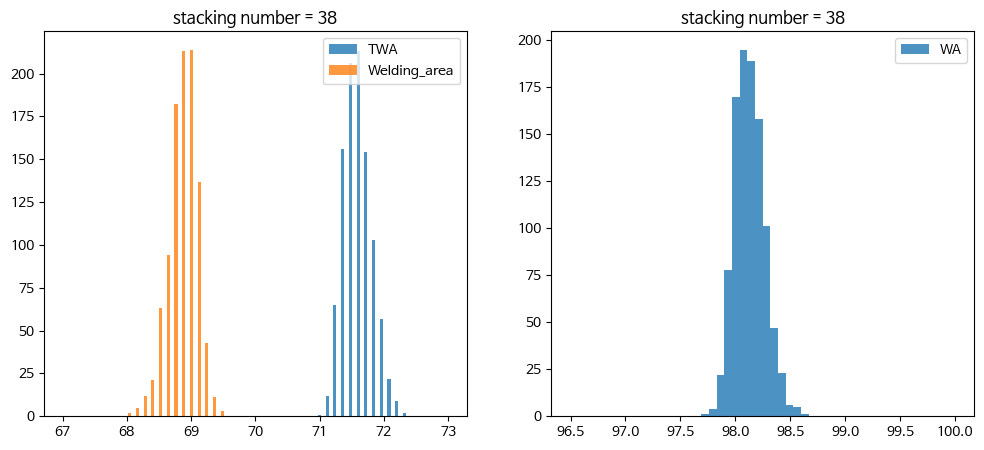

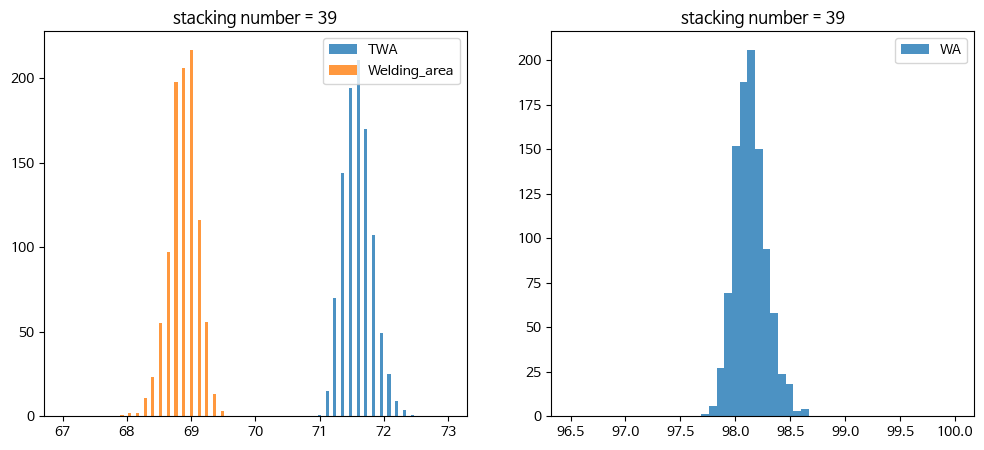

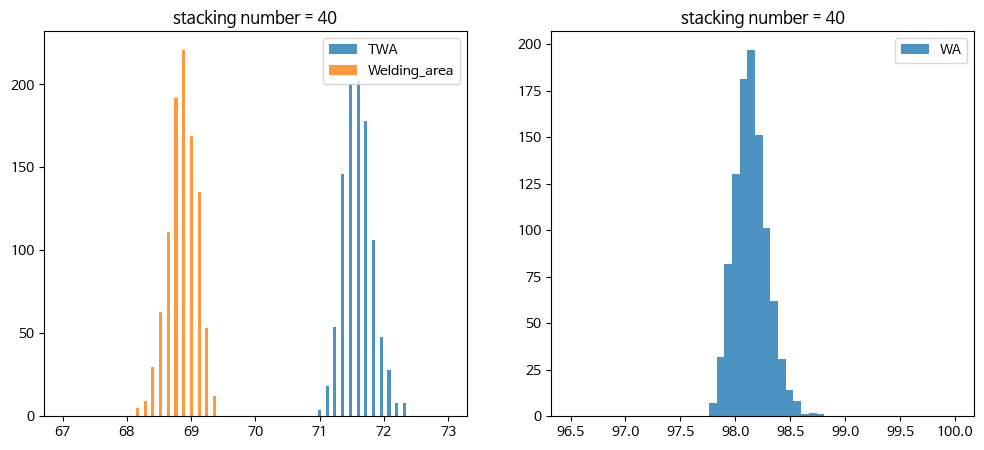

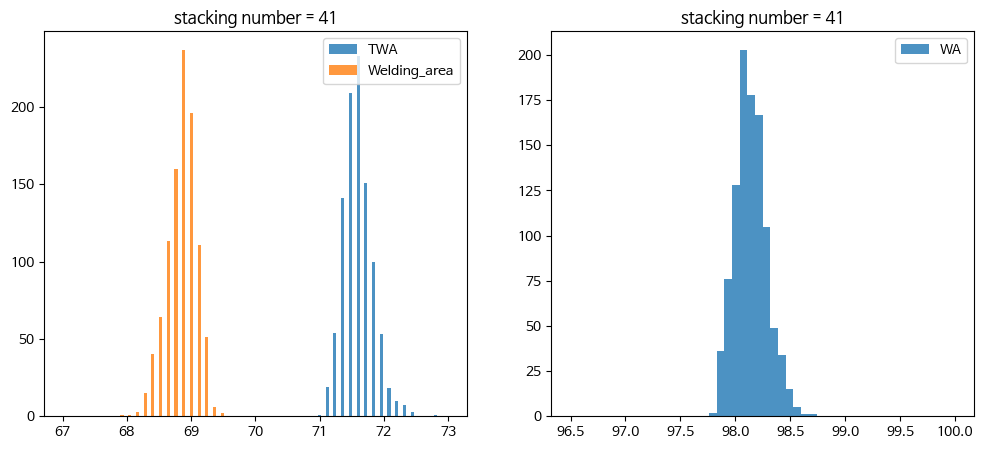

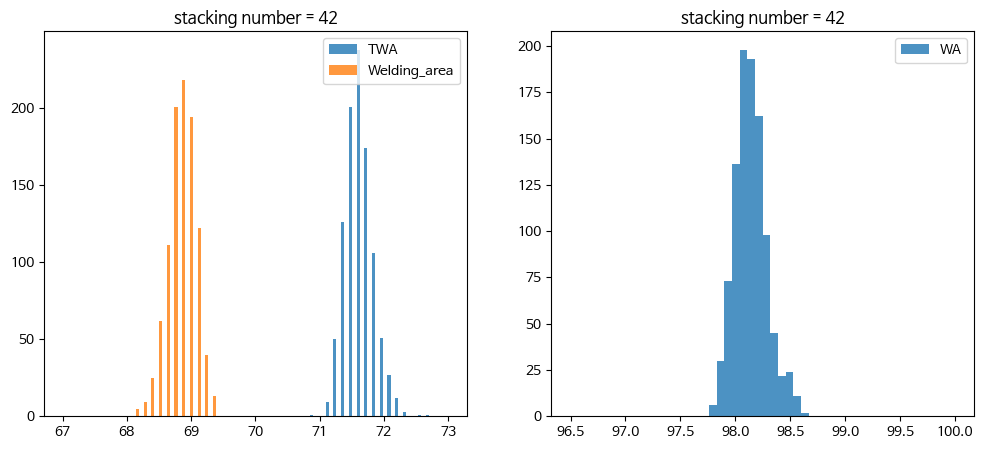

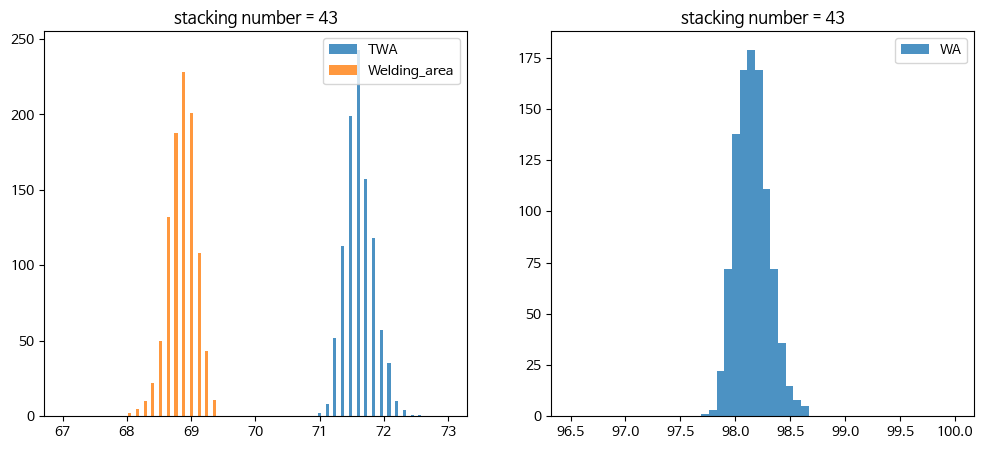

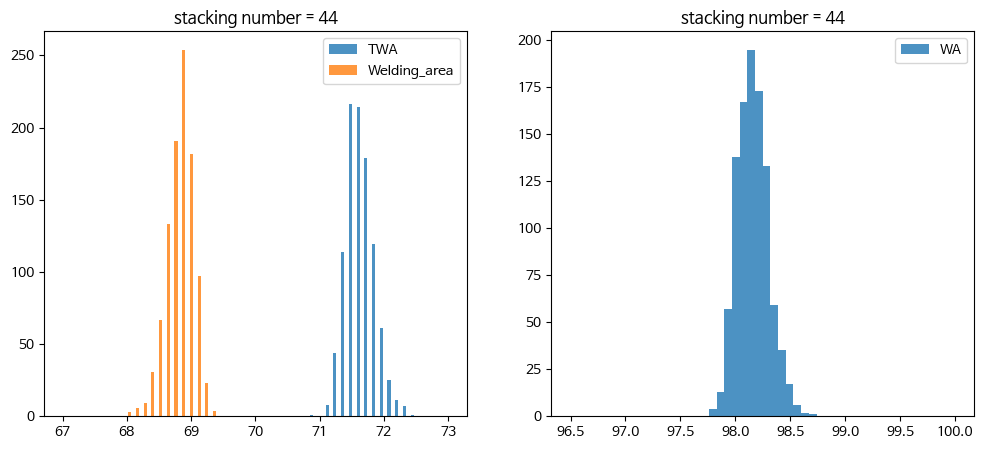

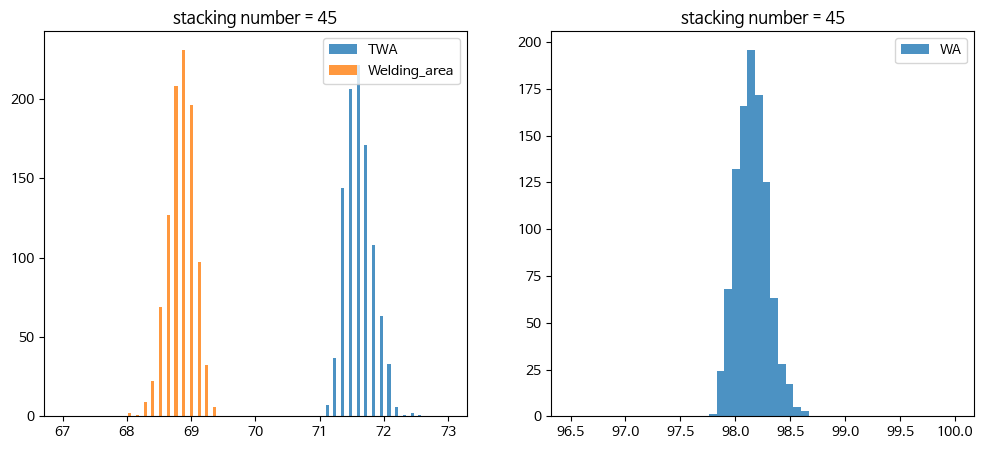

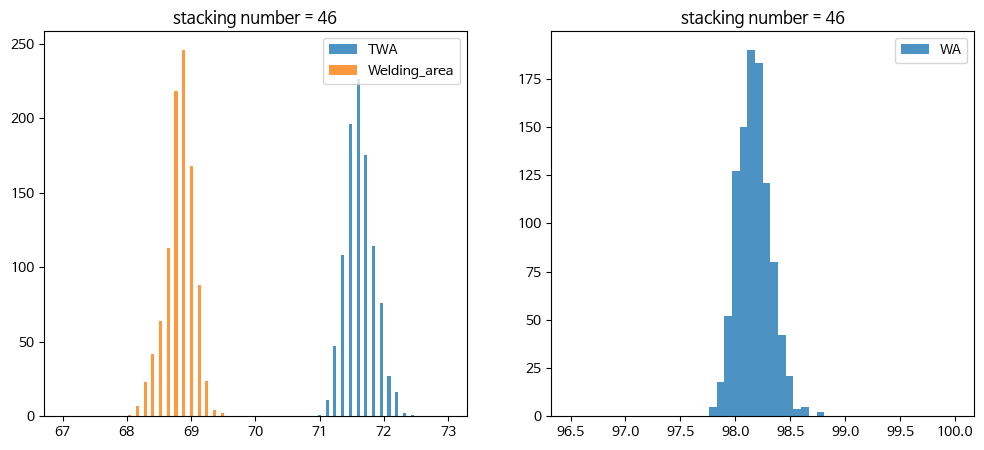

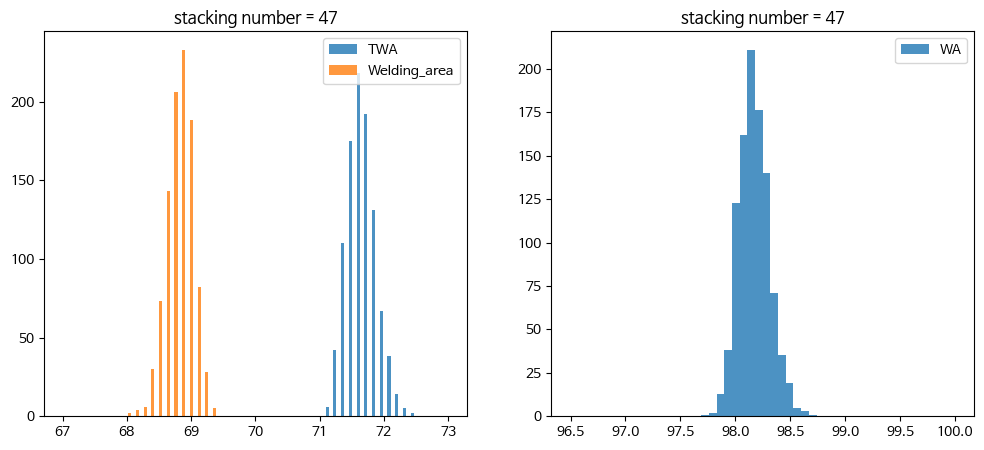

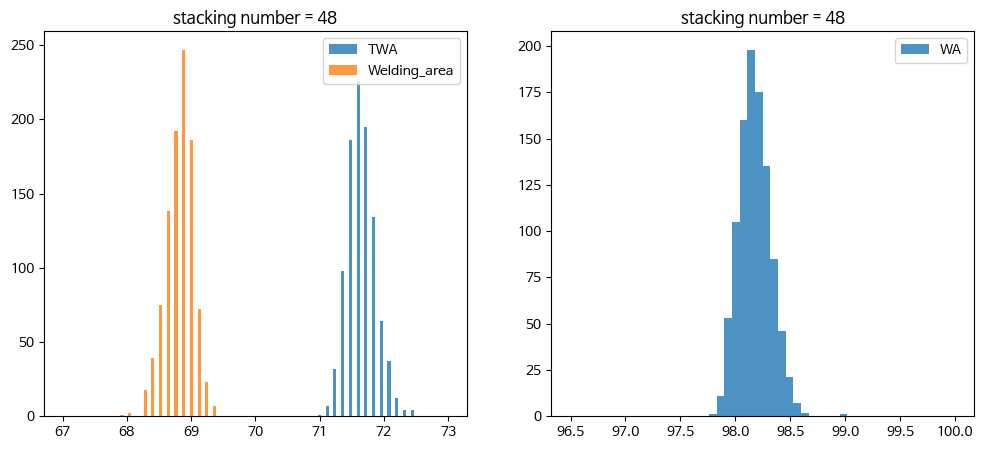

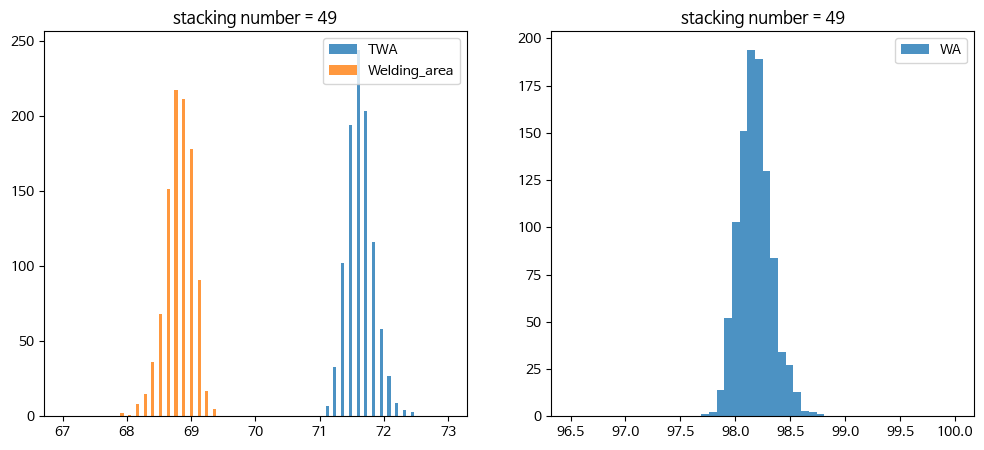

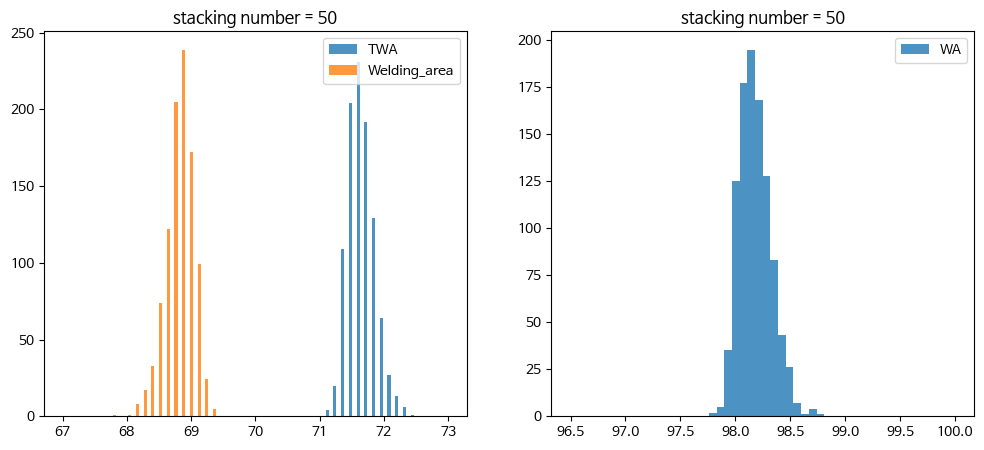

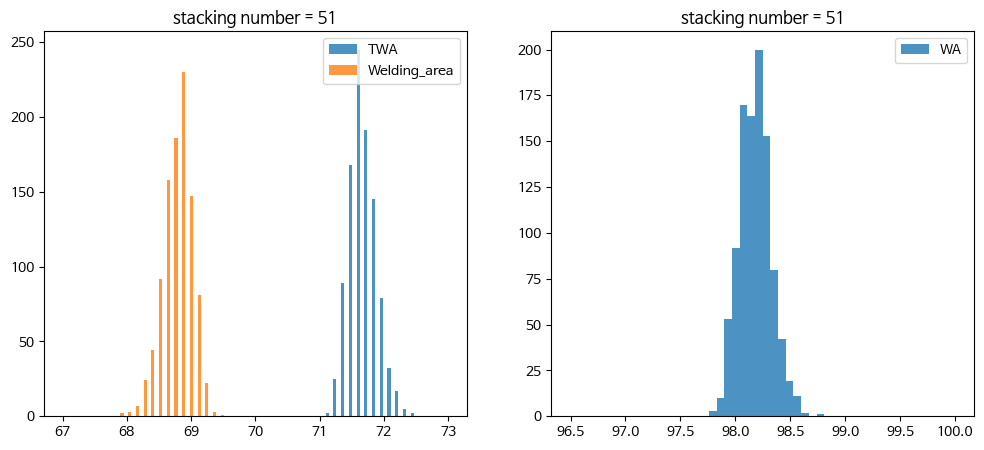

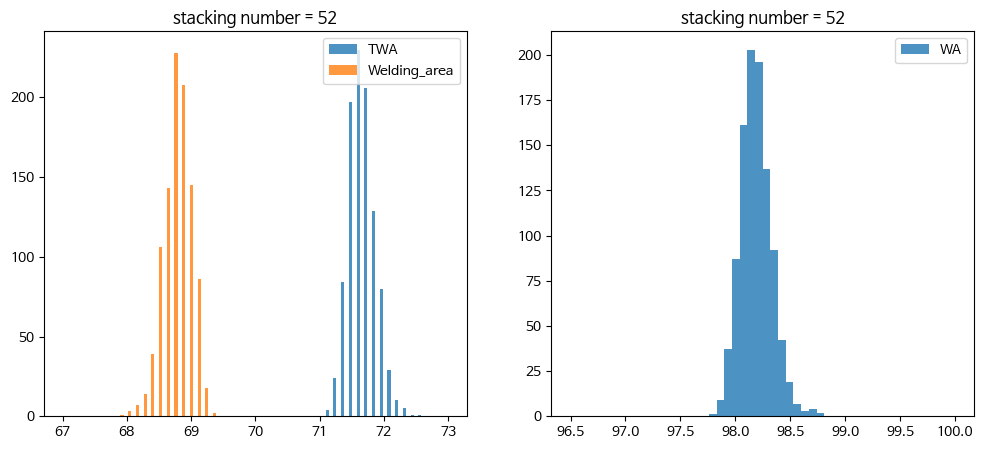

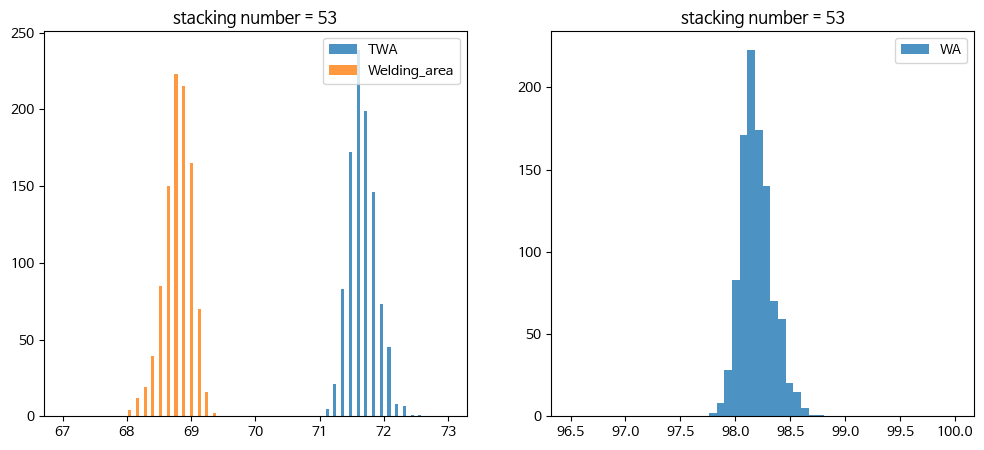

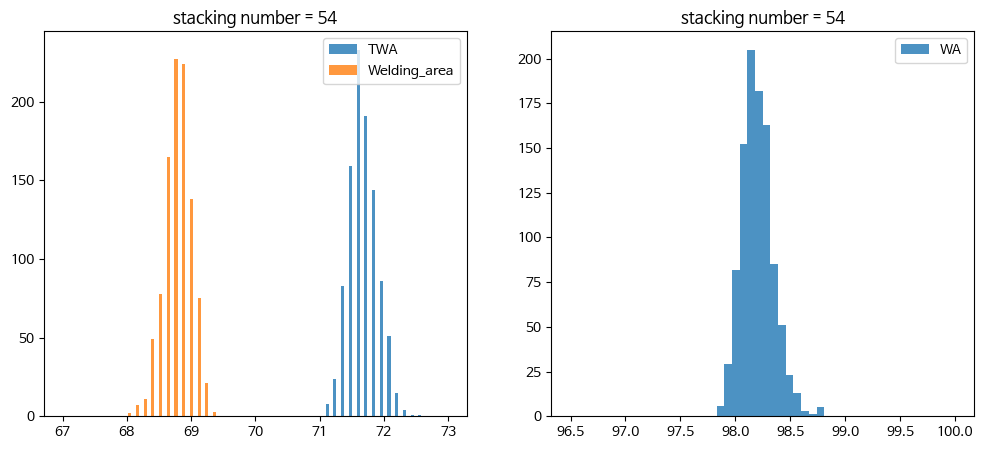

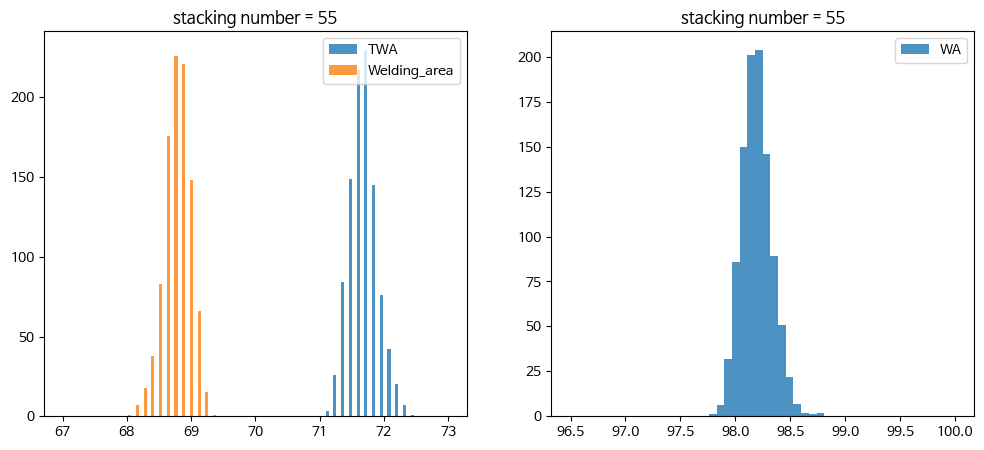

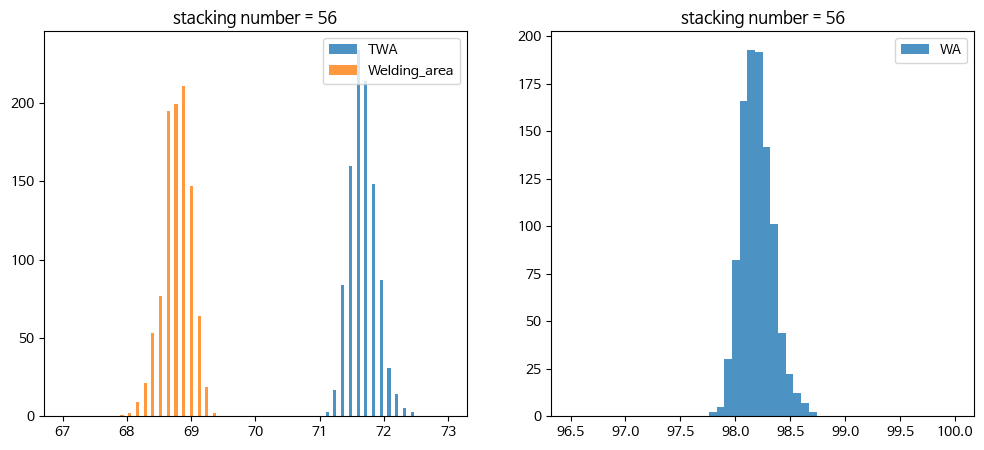

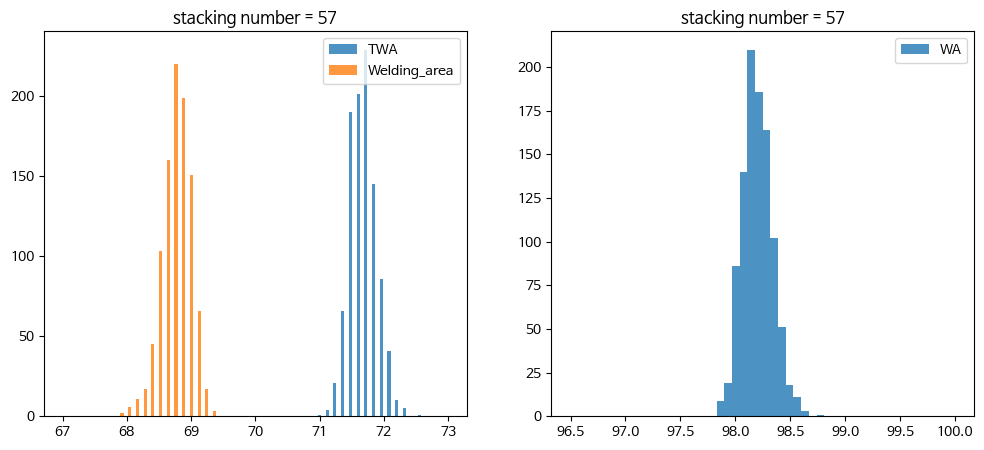

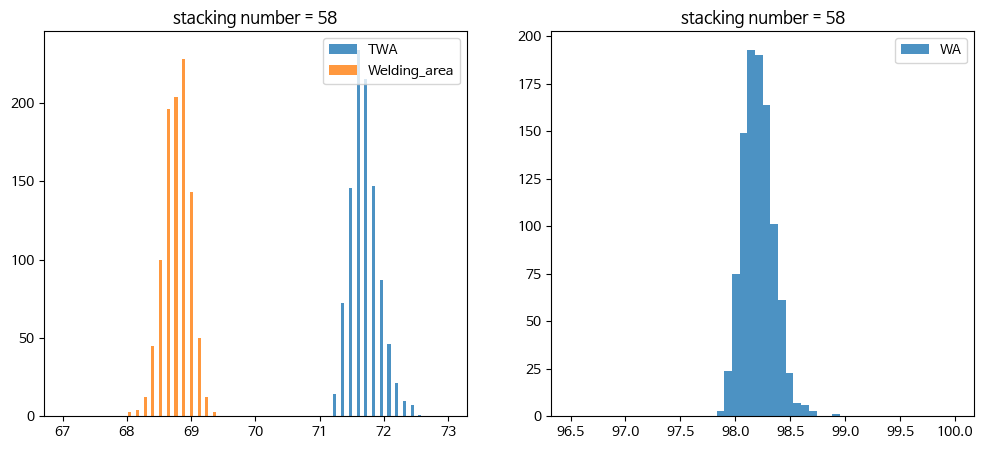

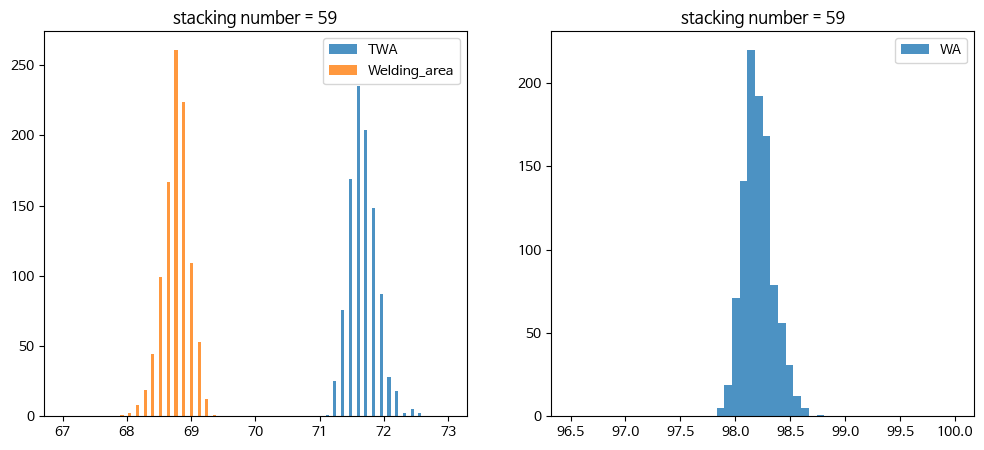

In [9]:
for i in stackingnumber :
  TWA_total = []
  WA_total = []
  weldingarea_total = []
  spec_out = []
  for j in range(count):
    TC_c = np.array([0 for k in range(i)])
    C_L = -47.328+0.145*np.random.randn(i)
    C_R = C_L+94.5+0.01*np.random.randn(i)
    TC_L = -35.01+0.025*np.random.randn(i)
    TC_R = -TC_L
    cathode = np.array([TC_c, C_L, C_R, TC_L, TC_R])
    TA_c = np.array([0 for k in range(i)])
    A_L = -48.737+0.083*np.random.randn(i)
    A_R = A_L+97.2+0.02*np.random.randn(i)
    TA_L = -35.02+0.036*np.random.randn(i)
    TA_R = -TA_L
    TA_L_new = -35.115+0.25*np.random.randn(i)
    TA_R_new = -TA_L_new
    anode = np.array([TA_c, A_L, A_R, TA_L, TA_R, TA_L_new, TA_R_new])
    mismatch = 0.12*np.random.randn(i)
    anode_lami = anode
    cathode_lami = cathode + mismatch
    C_center = (cathode_lami[1]+cathode_lami[2])/2
    stacking = 0.07*np.random.randn(i)
    anode_stack = anode_lami-C_center+stacking
    cathode_stack = cathode_lami -C_center + stacking
    stacked_anode_tab_outer_right =  np.max(anode_stack[6])
    stacked_anode_tab_inner_right =  np.min(anode_stack[6])
    stacked_anode_tab_outer_left = np.min(anode_stack[5])
    stacked_anode_tab_inner_left = np.max(anode_stack[5])
    stacked_anode_right = np.max(anode_stack[2])
    stacked_anode_left = np.min(anode_stack[1])
    stacked_tab_TWA = stacked_anode_tab_outer_right-stacked_anode_tab_outer_left
    stacked_anode_width = stacked_anode_right - stacked_anode_left
    welding_area = stacked_anode_tab_inner_right-stacked_anode_tab_inner_left
    TWA_total.append(stacked_tab_TWA)
    WA_total.append(stacked_anode_width)
    weldingarea_total.append(welding_area)
    if stacked_tab_TWA > 72.5:
      spec_out.append(stacked_tab_TWA)


  spec_out_rate_TWA.append(len(spec_out)/count)
  average_TWA.append(np.mean(TWA_total))
  stddev_TWA.append(np.std(TWA_total))
  average_WA.append(np.mean(WA_total))
  stddev_WA.append(np.std(WA_total))

  fig, ax = plt.subplots(ncols = 2,figsize=(12, 5))
  ax[0].hist([TWA_total, weldingarea_total], bins = 50, range = [67, 73], alpha = 0.8, label = ["TWA", "Welding_area"])
  ax[0].set_title(f"stacking number = {i}")
  ax[0].legend(loc="upper right")
  ax[1].hist(WA_total, bins = 50, range = [96.5,100], alpha = 0.8, label = ["WA"])
  ax[1].set_title(f"stacking number = {i}")
  ax[1].legend(loc="upper right")
  plt.show()


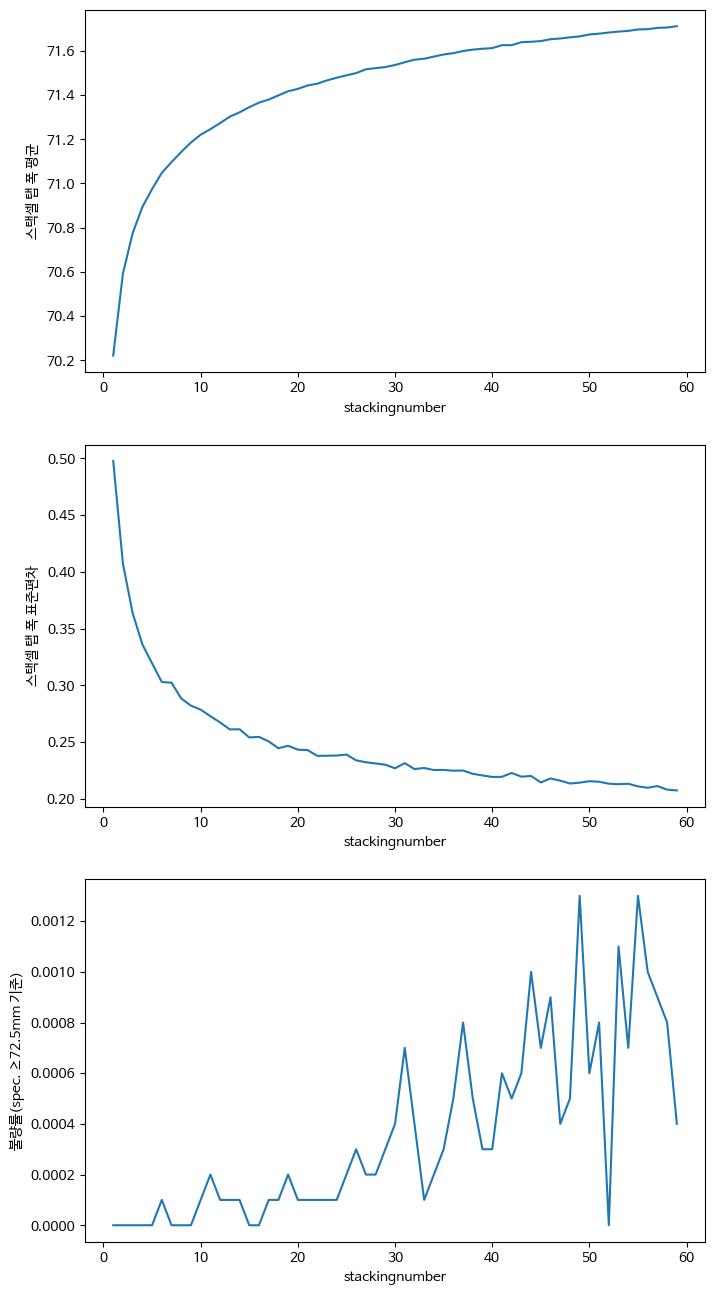

In [8]:
fig, ax = plt.subplots(nrows = 3, figsize = (8, 16))

ax[0].plot(stackingnumber,average_TWA)
ax[0].set_xlabel("stackingnumber")
ax[0].set_ylabel("스택셀 탭 폭 평균")
ax[1].plot(stackingnumber,stddev_TWA)
ax[1].set_xlabel("stackingnumber")
ax[1].set_ylabel("스택셀 탭 폭 표준편차")
ax[2].plot(stackingnumber, spec_out_rate_TWA)
ax[2].set_xlabel("stackingnumber")
ax[2].set_ylabel("불량률(spec. ≥72.5mm 기준)")
plt.show()

# **1차 vs 2차 시뮬레이션 비교**

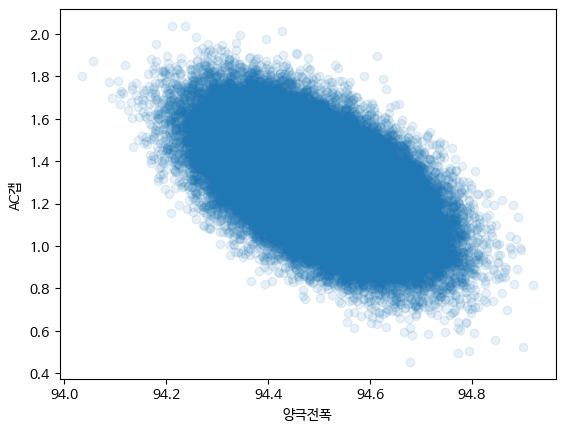

In [14]:


i = 100000
TC_c = np.array([0 for k in range(i)])
C_L = -47.328+0.015*np.random.randn(i)
C_R = C_L+94.5+0.1*np.random.randn(i)
TC_L = -35.01+0.025*np.random.randn(i)
TC_R = -TC_L
cathode = np.array([TC_c, C_L, C_R, TC_L, TC_R])
TA_c = np.array([0 for k in range(i)])
A_L = -48.737+0.083*np.random.randn(i)
A_R = A_L+97.2+0.02*np.random.randn(i)
TA_L = -35.02+0.036*np.random.randn(i)
TA_R = -TA_L
TA_L_new = -35.115+0.25*np.random.randn(i)
TA_R_new = -TA_L_new
anode = np.array([TA_c, A_L, A_R, TA_L, TA_R, TA_L_new, TA_R_new])
mismatch = 0.12*np.random.randn(i)
anode_lami = anode + mismatch
cathode_lami = cathode

plt.scatter(cathode_lami[2]-cathode_lami[1],anode_lami[2]-cathode_lami[2], alpha = 0.1)
plt.xlabel("양극전폭")
plt.ylabel("AC갭")
plt.show()

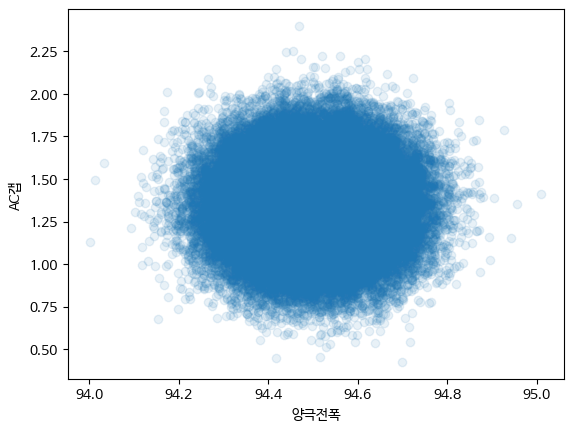

In [15]:
WC_half = 47.25+0.05*np.random.randn(i)
AC_1 = 1.35+0.85/4*np.random.randn(i)
TPA = 1.36+0.9/4*np.random.randn(i)


plt.scatter(WC_half*2, AC_1, alpha = 0.1)
plt.xlabel("양극전폭")
plt.ylabel("AC갭")
plt.show()

In [12]:
import numpy as np

i = 100000
TC_c = np.array([0 for k in range(i)])
C_L = -47.328+0.145*np.random.randn(i)
C_R = C_L+94.5+0.01*np.random.randn(i)
TC_L = -35.01+0.025*np.random.randn(i)
TC_R = -TC_L
cathode = np.array([TC_c, C_L, C_R, TC_L, TC_R])
TA_c = np.array([0 for k in range(i)])
A_L = -48.737+0.083*np.random.randn(i)
A_R = A_L+97.2+0.02*np.random.randn(i)
TA_L = -35.02+0.036*np.random.randn(i)
TA_R = -TA_L
TA_L_new = -35.115+0.25*np.random.randn(i)
TA_R_new = -TA_L_new
anode = np.array([TA_c, A_L, A_R, TA_L, TA_R, TA_L_new, TA_R_new])
mismatch = 0.11*np.random.randn(i)
anode_lami = anode
cathode_lami = cathode + mismatch

print(f"WA : {np.mean(anode_lami[2]-anode_lami[1])}")
print(f"WC : {np.mean(cathode_lami[2]-cathode_lami[1])}")

print(f"AC_gap_left_average(AC_3,4) : {np.mean(cathode_lami[1]-anode_lami[1])}")
print(f"AC_gap_left_std(AC_3,4) : {np.std(cathode_lami[1]-anode_lami[1])}")
print(f"AC_gap_right_average(AC_1,2) : {np.mean(anode_lami[2]-cathode_lami[2])}")
print(f"AC_gap_right_std(AC_1,2) : {np.std(anode_lami[2]-cathode_lami[2])}")

WA : 97.20002048760729
WC : 94.50002619993028
AC_gap_left_average(AC_3,4) : 1.4090599886513837
AC_gap_left_std(AC_3,4) : 0.19931022375163726
AC_gap_right_average(AC_1,2) : 1.2909342990256314
AC_gap_right_std(AC_1,2) : 0.2005629164584771
